In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Senior Year/Machine Learning/Data/KidneyStonetrain.csv')
df

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


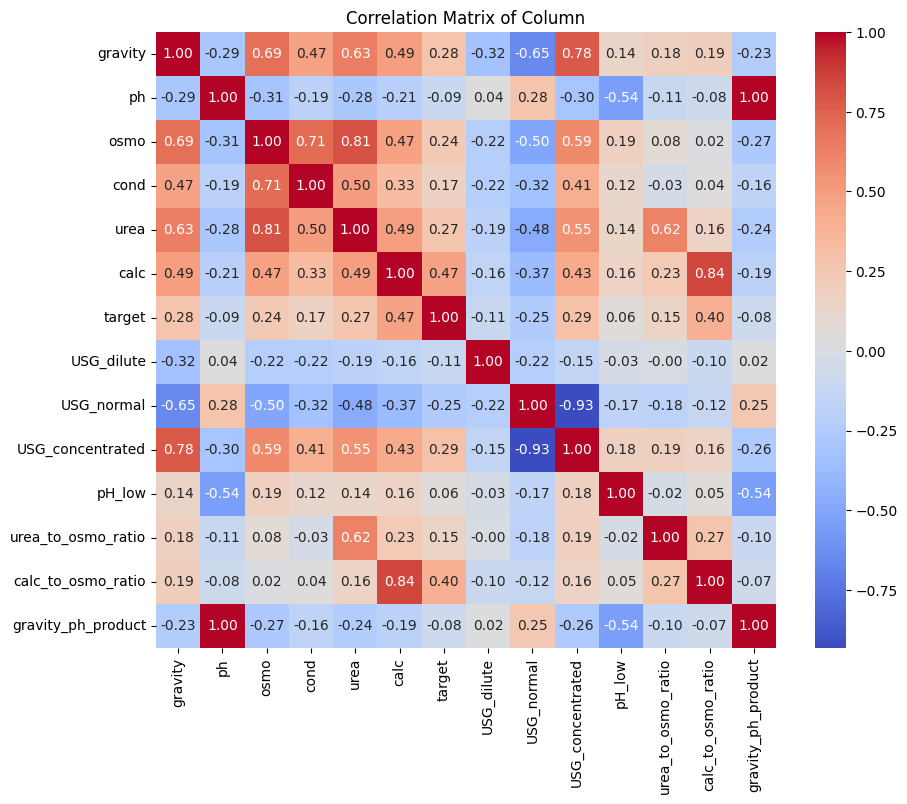

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Column')
plt.show()

Urine specific gravity is a laboratory test that shows the concentration of all chemical particles in the urine. The normal range for urine specific gravity is 1.005 to 1.030. USG is the ratio of the density (mass of a unit volume) of urine to the density (mass of the same unit volume) of a reference substance (water). USG values vary between 1.000 and 1.040 g/mL, USG less than 1.008 g/mL is regarded as dilute, and USG greater than 1.020 g/mL is considered concentrated. USG was higher in patients with stone formation than in those without stone formation (1.018±0.007 vs. 1.017±0.007)

```
```



When the pH of urine drops below 5.5, urine becomes saturated with uric acid crystals, a condition known as hypercalciuria. When there is too much uric acid in the urine, stones can form. Uric acid stones are more common in people who consume large amounts of protein, such as that found in red meat or poultry

Osmolarity refers to the number of solute particles per 1 L of solvent




In [ ]:
df = df.drop(columns=['id'])

In [ ]:
df['USG_dilute'] = (df['gravity'] < 1.008).astype(int)
df['USG_normal'] = ((df['gravity'] >= 1.008) & (df['gravity'] <= 1.020)).astype(int)
df['USG_concentrated'] = (df['gravity'] > 1.020).astype(int)

df['pH_low'] = (df['ph'] < 5.5).astype(int)

In [ ]:
df['urea_to_osmo_ratio'] = df['urea'] / df['osmo']
df['calc_to_osmo_ratio'] = df['calc'] / df['osmo']
df['gravity_ph_product'] = df['gravity'] * df['ph']

In [ ]:
features=df.drop(columns=['target'])
features

,gravity,ph,osmo,cond,urea,calc,USG_dilute,USG_normal,USG_concentrated,pH_low,urea_to_osmo_ratio,calc_to_osmo_ratio,gravity_ph_product
0,1.013,6.19,443,14.8,124,1.45,0,1,0,0,0.279910,0.003273,6.27047
1,1.025,5.40,703,23.6,394,4.18,0,0,1,1,0.560455,0.005946,5.53500
2,1.009,6.13,371,24.5,159,9.04,0,1,0,0,0.428571,0.024367,6.18517
3,1.021,4.91,442,20.8,398,6.63,0,0,1,1,0.900452,0.015000,5.01311
4,1.021,5.53,874,17.8,385,2.21,0,0,1,0,0.440503,0.002529,5.64613
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1.011,5.21,527,21.4,75,1.53,0,1,0,1,0.142315,0.002903,5.26731
410,1.024,5.53,577,19.7,224,0.77,0,0,1,0,0.388215,0.001334,5.66272
411,1.018,6.28,455,22.2,270,7.68,0,1,0,0,0.593407,0.016879,6.39304
412,1.008,7.12,325,12.6,75,1.03,0,1,0,0,0.230769,0.003169,7.17696


In [ ]:
X=features
X
Y=df['target']
Y

0      0
1      0
2      0
3      1
4      1
      ..
409    0
410    0
411    1
412    1
413    0
Name: target, Length: 414, dtype: int64

In [ ]:
X

,gravity,ph,osmo,cond,urea,calc,USG_dilute,USG_normal,USG_concentrated,pH_low,urea_to_osmo_ratio,calc_to_osmo_ratio,gravity_ph_product
0,1.013,6.19,443,14.8,124,1.45,0,1,0,0,0.279910,0.003273,6.27047
1,1.025,5.40,703,23.6,394,4.18,0,0,1,1,0.560455,0.005946,5.53500
2,1.009,6.13,371,24.5,159,9.04,0,1,0,0,0.428571,0.024367,6.18517
3,1.021,4.91,442,20.8,398,6.63,0,0,1,1,0.900452,0.015000,5.01311
4,1.021,5.53,874,17.8,385,2.21,0,0,1,0,0.440503,0.002529,5.64613
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1.011,5.21,527,21.4,75,1.53,0,1,0,1,0.142315,0.002903,5.26731
410,1.024,5.53,577,19.7,224,0.77,0,0,1,0,0.388215,0.001334,5.66272
411,1.018,6.28,455,22.2,270,7.68,0,1,0,0,0.593407,0.016879,6.39304
412,1.008,7.12,325,12.6,75,1.03,0,1,0,0,0.230769,0.003169,7.17696


<Figure size 1500x1500 with 0 Axes>

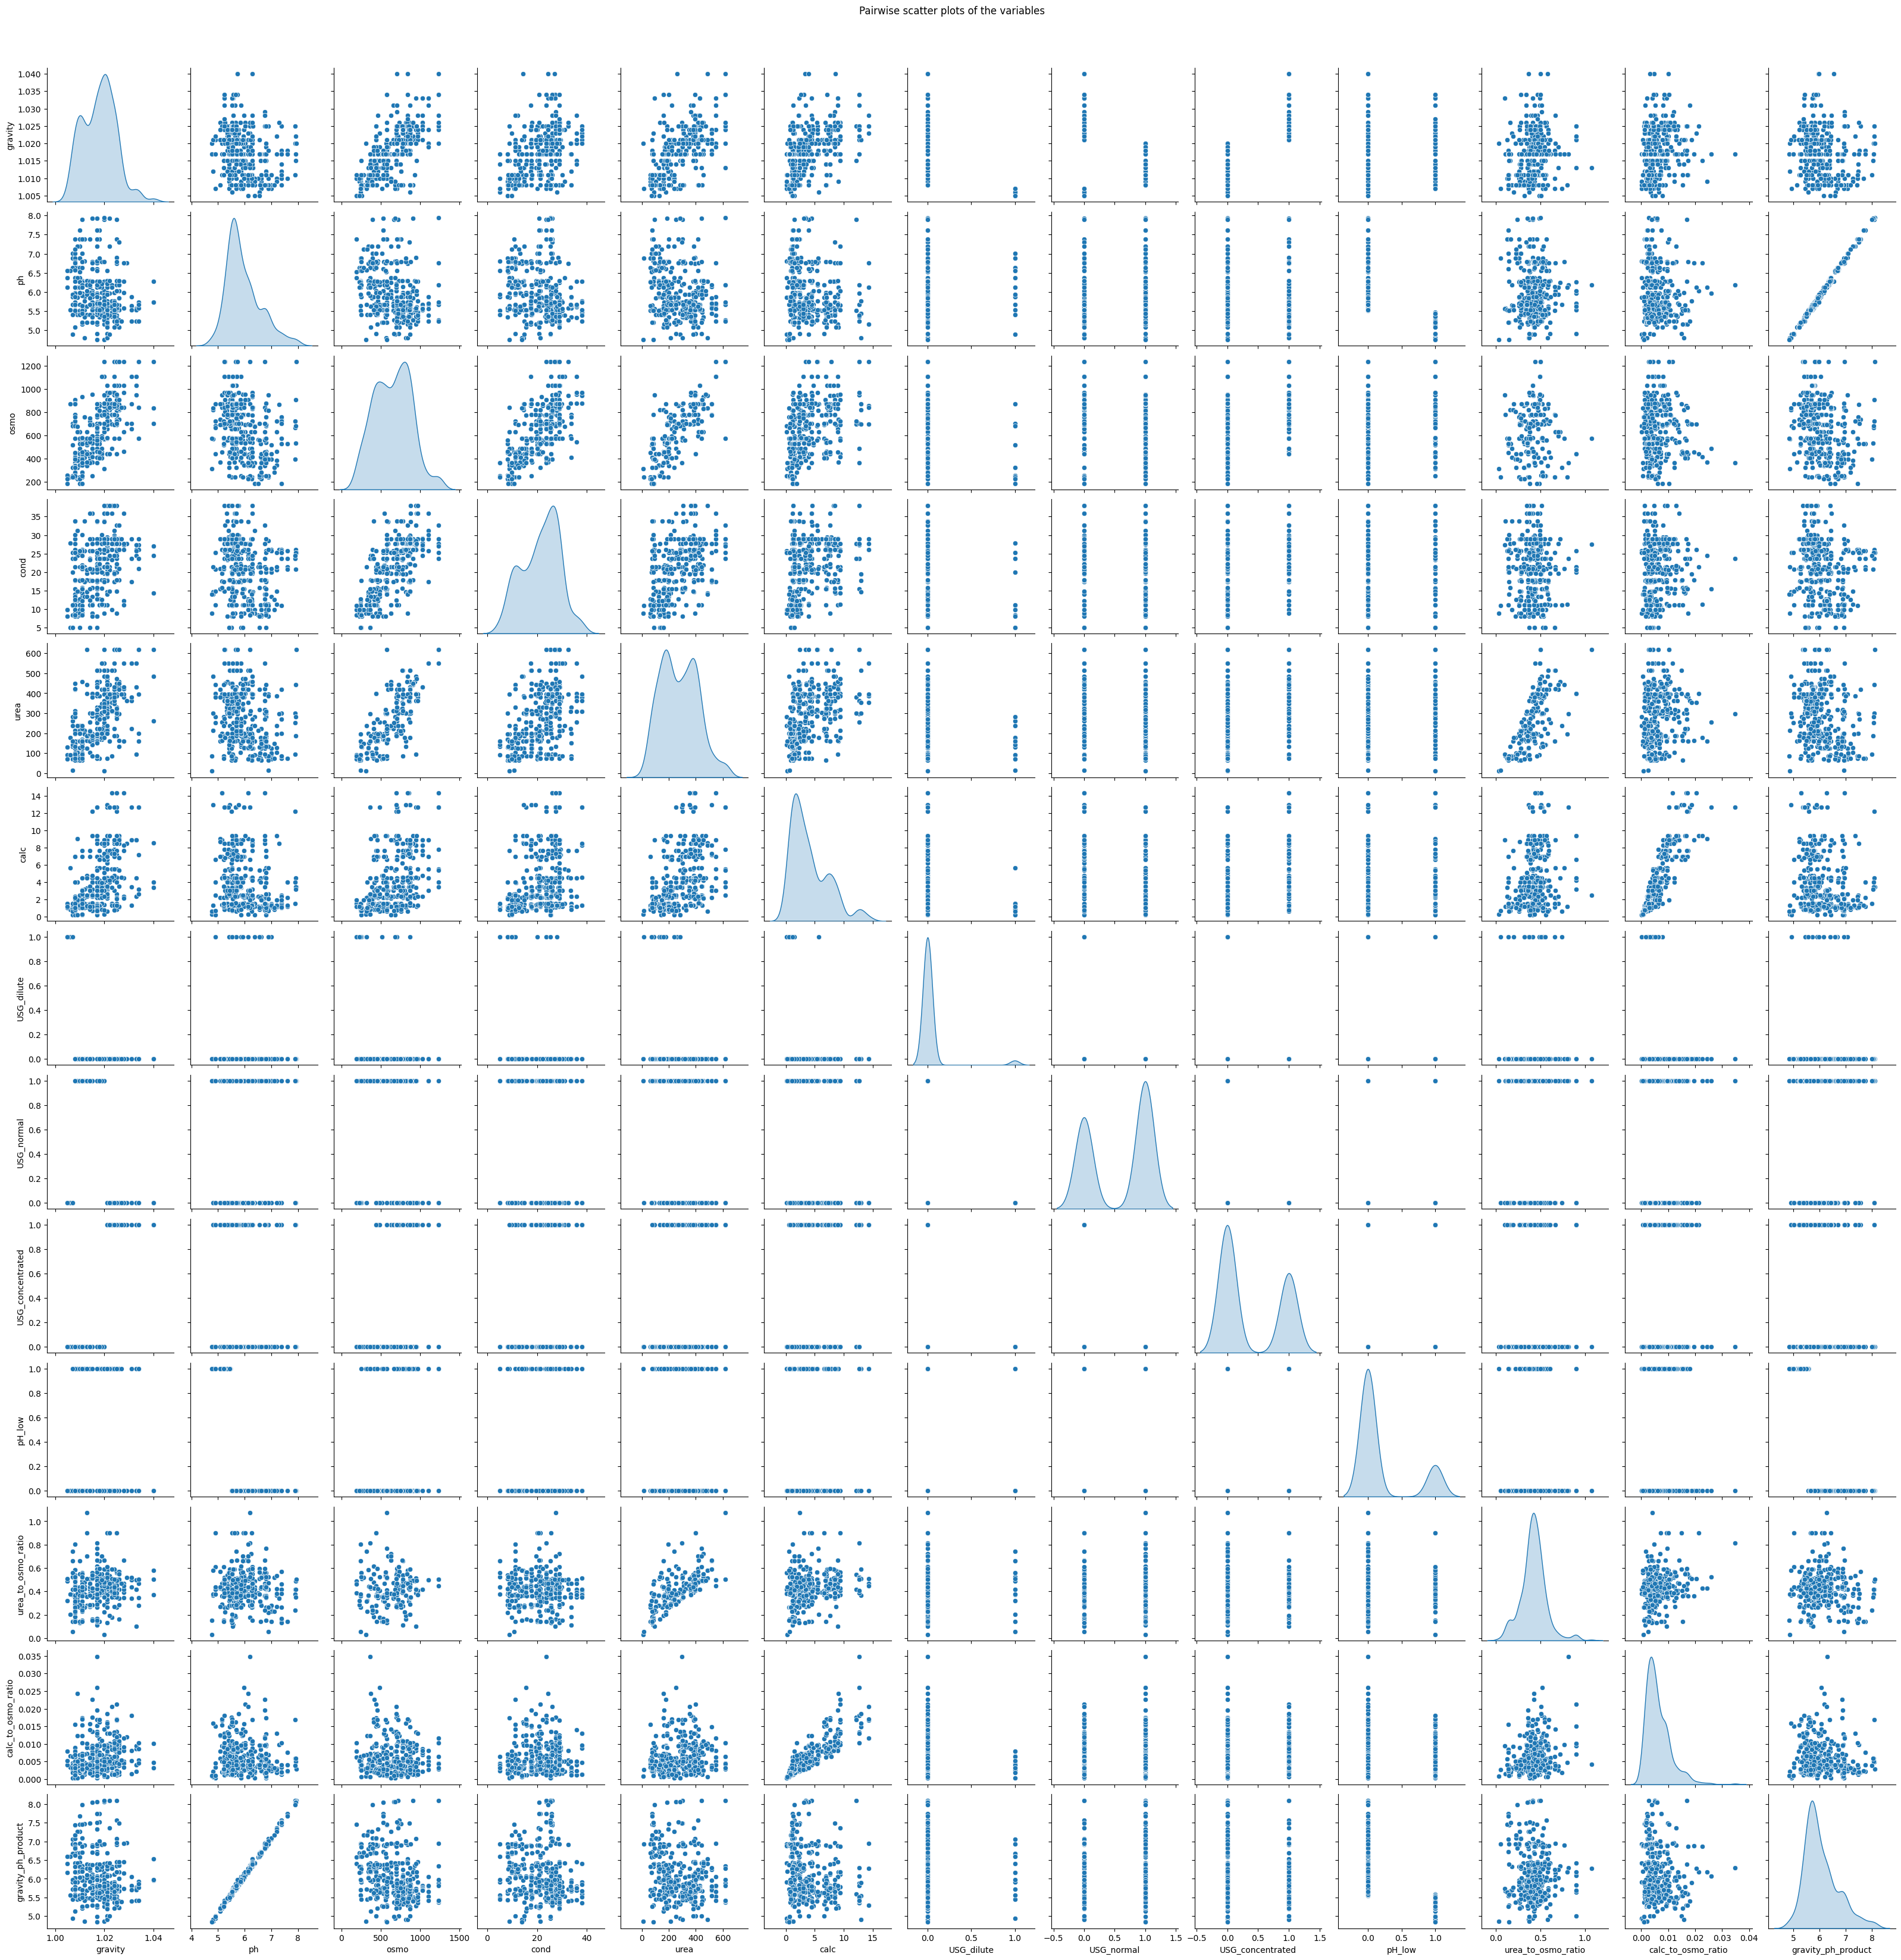

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

sns.pairplot(df.drop(columns=["target"]), diag_kind="kde")

plt.suptitle("Pairwise scatter plots of the variables", y=1.02)
plt.show()


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,gravity,ph,osmo,cond,urea,calc,USG_dilute,USG_normal,USG_concentrated,pH_low,urea_to_osmo_ratio,calc_to_osmo_ratio,gravity_ph_product
0,-0.734032,0.365623,-0.889728,-0.884388,-1.134869,-0.829136,-0.187083,0.847256,-0.789639,-0.496979,-1.019892,-0.662987,0.326636
1,1.065904,-0.865897,0.219521,0.288059,0.846384,0.020338,-0.187083,-1.180281,1.266402,2.012158,0.968820,-0.074613,-0.819025
2,-1.334010,0.272090,-1.196904,0.407969,-0.878040,1.532589,-0.187083,0.847256,-0.789639,-0.496979,0.033931,3.980375,0.193762
3,0.465925,-1.629751,-0.893994,-0.084992,0.875736,0.782687,-0.187083,-1.180281,1.266402,2.012158,3.378969,1.918482,-1.631987
4,0.465925,-0.663242,0.949065,-0.484690,0.780342,-0.592652,-0.187083,-1.180281,1.266402,-0.496979,0.118514,-0.826883,-0.645915


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape

((331, 13), (83, 13))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = {
    'gbt__n_estimators': [50, 100, 200],
    'gbt__learning_rate': [0.001, 0.01, 0.1, 0.5],
    'gbt__max_depth': [3, 4, 5],
    'gbt__subsample': [0.8, 0.9, 1.0],
    'gbt__max_features': ['sqrt', 'log2', None]
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gbt', GradientBoostingClassifier(random_state=42))
])

In [ ]:
grid_search_pipeline = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_pipeline.fit(X_train, y_train)

best_params_pipeline = grid_search_pipeline.best_params_

best_params_pipeline

{'gbt__learning_rate': 0.1,
 'gbt__max_depth': 5,
 'gbt__max_features': 'sqrt',
 'gbt__n_estimators': 50,
 'gbt__subsample': 0.9}

In [ ]:
pipeline.set_params(gbt__n_estimators=best_params_pipeline['gbt__n_estimators'],
                    gbt__learning_rate=best_params_pipeline['gbt__learning_rate'],
                    gbt__max_features=best_params_pipeline['gbt__max_features'],
                    gbt__max_depth=best_params_pipeline['gbt__max_depth'],
                    gbt__subsample=best_params_pipeline['gbt__subsample'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbt',
                 GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                                            n_estimators=50, random_state=42,
                                            subsample=0.9))])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbt',
                 GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                                            n_estimators=50, random_state=42,
                                            subsample=0.9))])

In [ ]:
y_pred = pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.7590361445783133

In [ ]:
from sklearn.svm import SVC

param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))
])

grid_search_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_svm.fit(X_train, y_train)
best_params_svm = grid_search_svm.best_params_


best_params_svm

{'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}

In [ ]:
svm_pipeline.set_params(svm__C=best_params_svm['svm__C'],
                    svm__kernel=best_params_svm['svm__kernel'],
                    svm__gamma=best_params_svm['svm__gamma'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))])

In [ ]:
import xgboost as xgb

param_grid_xgb_simple = {
    'xgb__n_estimators': [50, 100],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__max_depth': [3, 5],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

grid_search_xgb_simple = GridSearchCV(xgb_pipeline, param_grid_xgb_simple, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_xgb_simple.fit(X_train, y_train)
best_params_xgb = grid_search_xgb_simple.best_params_

best_params_xgb


{'xgb__colsample_bytree': 0.8,
 'xgb__learning_rate': 0.01,
 'xgb__max_depth': 3,
 'xgb__n_estimators': 50,
 'xgb__subsample': 0.8}

In [ ]:
xgb_pipeline.set_params(xgb__n_estimators=best_params_xgb['xgb__n_estimators'],
                    xgb__learning_rate=best_params_xgb['xgb__learning_rate'],
                    xgb__max_depth=best_params_xgb['xgb__max_depth'],
                    xgb__subsample=best_params_xgb['xgb__subsample'],
                    xgb__colsample_bytree=best_params_xgb['xgb__colsample_bytree'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
svm_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))])

In [ ]:
xgb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
from scipy.stats import mode

gbt_preds = pipeline.predict(X_val)
svm_preds = svm_pipeline.predict(X_val)
xgb_preds = xgb_pipeline.fit(X_train, y_train).predict(X_val)

combined_preds = np.vstack((gbt_preds, svm_preds, xgb_preds))

majority_votes, _ = mode(combined_preds, axis=0)
majority_votes = majority_votes.flatten()

majority_voting_accuracy = (majority_votes == y_val).mean()

majority_voting_accuracy


0.7831325301204819

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Senior Year/Machine Learning/Data/test (2).csv")

test_ids = test_data["id"]

X_test = test_data.drop(columns=['id'])
X_test['USG_dilute'] = (X_test['gravity'] < 1.008).astype(int)
X_test['USG_normal'] = ((X_test['gravity'] >= 1.008) & (X_test['gravity'] <= 1.020)).astype(int)
X_test['USG_concentrated'] = (X_test['gravity'] > 1.020).astype(int)
X_test['pH_low'] = (X_test['ph'] < 5.5).astype(int)
X_test['urea_to_osmo_ratio'] = X_test['urea'] / X_test['osmo']
X_test['calc_to_osmo_ratio'] = X_test['calc'] / X_test['osmo']
X_test['gravity_ph_product'] = X_test['gravity'] * X_test['ph']


gbt_preds_test = pipeline.predict(X_test)
svm_preds_test = svm_pipeline.predict(X_test)
xgb_preds_test = xgb_pipeline.predict(X_test)

combined_preds_test = np.vstack((gbt_preds_test, svm_preds_test, xgb_preds_test))

majority_votes_test, _ = mode(combined_preds_test, axis=0)
majority_votes_test = majority_votes_test.flatten()

submission_df = pd.DataFrame({
    "id": test_ids,
    "target": majority_votes_test
})

submission_file_path = "/content/drive/MyDrive/Senior Year/Machine Learning/Data/KaggleKidneyStonePred.csv"
submission_df.to_csv(submission_file_path, index=False)

submission_file_path

'/content/drive/MyDrive/Senior Year/Machine Learning/Data/KaggleKidneyStonePred.csv'